In [1]:
import numpy as np
import IPython
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
BASE_PERIOD = 200
SAWTOOTH = np.array([i / BASE_PERIOD for i in range(BASE_PERIOD)]) - 0.5
SQUARE = np.zeros(32)
SQUARE[0:16] += 1
SQUARE -= 0.5
WONKY = np.array([np.random.random() for i in range(BASE_PERIOD)])
BASE_WAVE = SAWTOOTH

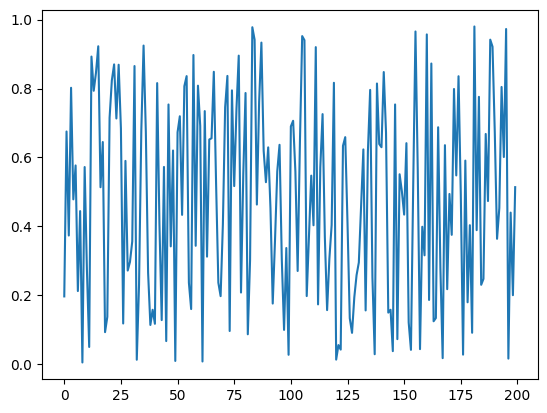

In [3]:
plt.plot(WONKY)

In [4]:
transform = np.fft.fft(BASE_WAVE)
NUM_LINES = BASE_PERIOD // 2 + 1
print(transform)
transform = transform[:NUM_LINES]
mags = abs(transform)
phases = np.angle(transform)
freq_scalars = np.array([i for i in range(NUM_LINES)])
mags[1:-1] *= 2
mags /= BASE_PERIOD

[-0.5+0.00000000e+00j -0.5+3.18283706e+01j -0.5+1.59102580e+01j
 -0.5+1.06024744e+01j -0.5+7.94727242e+00j -0.5+6.35310237e+00j
 -0.5+5.28944750e+00j -0.5+4.52894334e+00j -0.5+3.95790754e+00j
 -0.5+3.51318311e+00j -0.5+3.15687576e+00j -0.5+2.86487082e+00j
 -0.5+2.62109179e+00j -0.5+2.41440868e+00j -0.5+2.23687141e+00j
 -0.5+2.08264989e+00j -0.5+1.94737143e+00j -0.5+1.82769218e+00j
 -0.5+1.72101129e+00j -0.5+1.62527540e+00j -0.5+1.53884177e+00j
 -0.5+1.46038049e+00j -0.5+1.38880343e+00j -0.5+1.32321161e+00j
 -0.5+1.26285584e+00j -0.5+1.20710678e+00j -0.5+1.15543183e+00j
 -0.5+1.10737725e+00j -0.5+1.06255409e+00j -0.5+1.02062698e+00j
 -0.5+9.81305253e-01j -0.5+9.44335671e-01j -0.5+9.09496624e-01j
 -0.5+8.76593316e-01j -0.5+8.45453828e-01j -0.5+8.15925844e-01j
 -0.5+7.87873930e-01j -0.5+7.61177253e-01j -0.5+7.35727658e-01j
 -0.5+7.11428039e-01j -0.5+6.88190960e-01j -0.5+6.65937476e-01j
 -0.5+6.44596116e-01j -0.5+6.24102018e-01j -0.5+6.04396175e-01j
 -0.5+5.85424783e-01j -0.5+5.67138675e-0

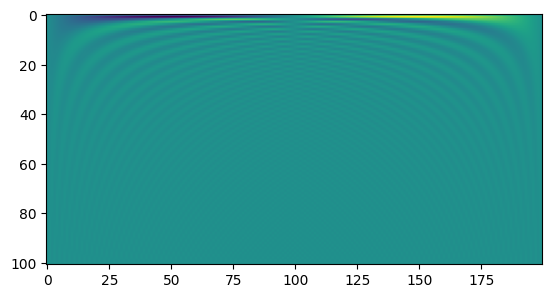

In [5]:
a = np.tile(np.arange(BASE_PERIOD) * 2 * np.pi / BASE_PERIOD, NUM_LINES)
a = np.reshape(a, (NUM_LINES, BASE_PERIOD))
for i in range(NUM_LINES):
    a[i] = (mags[i] * np.cos((freq_scalars[i] * a[i]) + phases[i]) )# + (mags[i] * np.cos((len(transform) - i * a[i]) + phases[i]) / len(transform))
plt.imshow(a)

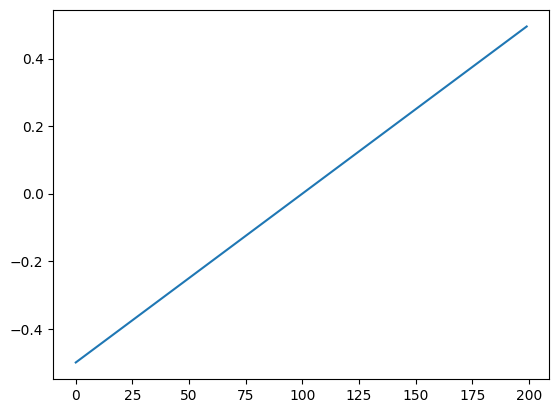

In [6]:
plt.plot(np.sum(a, axis=0))

In [7]:
FS = 44100

In [8]:
def oscillator(amp, freq, phase, num_samples):
    samples = np.arange(num_samples) / FS
    return amp * np.cos(freq * 2 * np.pi * samples + phase)

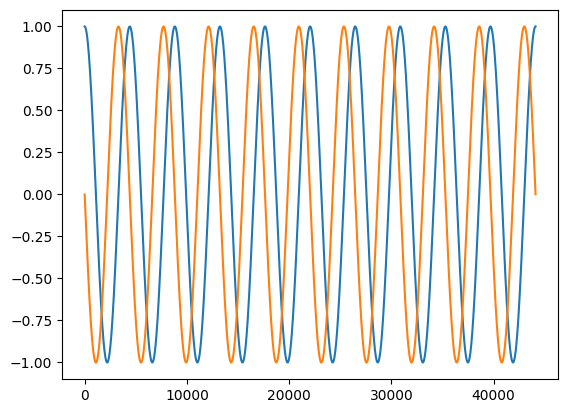

In [9]:
plt.plot(oscillator(1, 10, 0, 44100))
plt.plot(oscillator(1, 10, np.pi / 2, 44100))

In [10]:
def construct_wave(num_samples, frequency, mags, phases):
    result = np.zeros(num_samples)
    for i in range(len(mags)):
        overtone_freq = i * frequency
        if overtone_freq < FS * 0.45:
            result += oscillator(mags[i], overtone_freq, phases[i], num_samples)
    return result

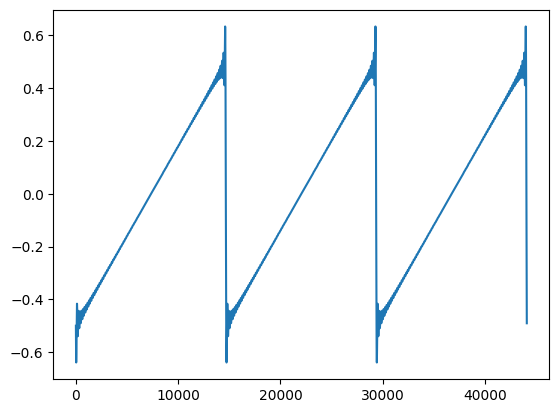

In [11]:
plt.plot(construct_wave(44100, 3, mags, phases))

In [12]:
test_freqs = [20, 100, 400, 800, 1600, 4000, 8000, 15000]
for f in test_freqs:
    print(f)
    w = construct_wave(44100 * 2, f, mags, phases)
    wavfile.write(f'crazy{f}.wav', FS, w)

20
100
400
800
1600
4000
8000
15000
